# Turning things upside down, using the FinalDatase.csv for training and the other as a check

[nltk_data] Downloading package punkt to /Users/joe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/joe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/joe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.800557994502113
Confusion Matrix:
 [[10048  2436]
 [ 2425  9464]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81     12484
           1       0.80      0.80      0.80     11889

    accuracy                           0.80     24373
   macro avg       0.80      0.80      0.80     24373
weighted avg       0.80      0.80      0.80     24373



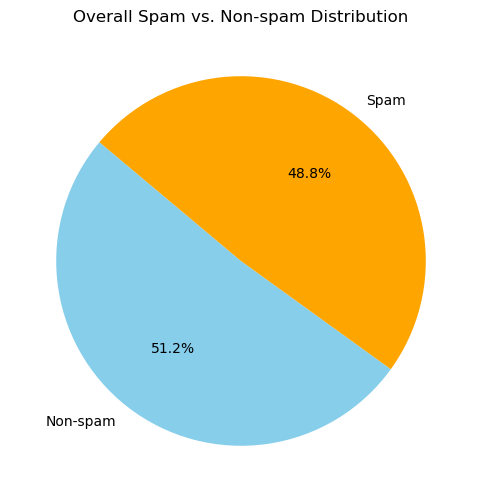

Model saved to final_dataset_spam_model.joblib
Vectorizer saved to final_dataset_spam_vectorizer.joblib


In [2]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import joblib

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function for text preprocessing
def preprocess_text(text, use_stemming=True):
    # Tokenization
    tokens = word_tokenize(str(text))

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    if use_stemming:
        # Stemming
        stemmer = PorterStemmer()
        processed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    else:
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        processed_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return ' '.join(processed_tokens)

# Load dataset
df = pd.read_csv('Final-Dataset.csv')

# Preprocess the text data
df['PROCESSED_COMMENT'] = df['FORMATTED_CONTENT'].apply(lambda x: preprocess_text(str(x)))

# Split dataset into training and testing
X = df['PROCESSED_COMMENT']
y = df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize spam vs. non-spam distribution
class_counts = df['CLASS'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['Non-spam', 'Spam'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Overall Spam vs. Non-spam Distribution')
plt.show()

# Save the model and vectorizer
MODEL_PATH = "final_dataset_spam_model.joblib"
VECTORIZER_PATH = "final_dataset_spam_vectorizer.joblib"

joblib.dump(model, MODEL_PATH)
joblib.dump(vectorizer, VECTORIZER_PATH)

print(f"Model saved to {MODEL_PATH}")
print(f"Vectorizer saved to {VECTORIZER_PATH}")

# Prediction function
def pred_class(comment):
    # Transform the input comment using the loaded vectorizer
    comment_vectorized = vectorizer.transform([comment])

    # Predict using the loaded model
    predicted_class = model.predict(comment_vectorized)[0]

    # Return the result
    return predicted_class

# # Optional: Apply predictions to the entire dataset
# df['Prediction'] = df['FORMATTED_CONTENT'].apply(pred_class)

# # Save the updated dataset with predictions
# df.to_csv('Final-Dataset_with_predictions.csv2', index=False)
# print("Dataset with predictions saved to Final-Dataset_with_predictions.csv")

In [6]:
import pandas as pd
import joblib

# Load the saved model and vectorizer
MODEL_PATH = "final_dataset_spam_model.joblib"
VECTORIZER_PATH = "final_dataset_spam_vectorizer.joblib"

loaded_model = joblib.load(MODEL_PATH)
loaded_vectorizer = joblib.load(VECTORIZER_PATH)

def pred_class(comment):
    # Transform the input comment using the loaded vectorizer
    comment_vectorized = loaded_vectorizer.transform([comment])
    
    # Predict using the loaded model
    predicted_class = loaded_model.predict(comment_vectorized)[0]
    
    # Return the result
    if predicted_class == 0:
        return 0
    else:
        return 1

# Load the CSV file
CSV_FILE_PATH = "Youtube-Spam-Dataset.csv"  # Update with your actual file path
OUTPUT_FILE_PATH = "comments_with_predictionsemp.csv"

df = pd.read_csv('Youtube-Spam-Dataset.csv')

# Assume the comments are in a column named 'comment'
if 'CONTENT' in df.columns:
    # Apply the prediction function to each comment
    df['Prediction'] = df['CONTENT'].apply(pred_class)
    
    # Save the updated DataFrame to a new CSV file
    df.to_csv(OUTPUT_FILE_PATH, index=False)
    print(f"Predictions saved to {OUTPUT_FILE_PATH}")
else:
    print("The CSV file does not contain a 'comment' column.")

Predictions saved to comments_with_predictionsemp.csv


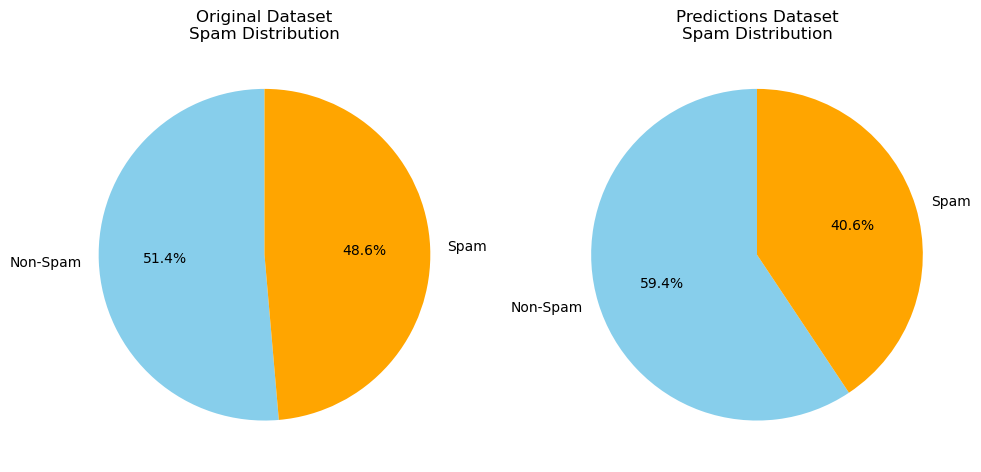

Original Dataset Counts:
CLASS
1    1005
0     951
Name: count, dtype: int64

Predictions Dataset Counts:
Prediction
0    1161
1     795
Name: count, dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
original_dataset = pd.read_csv('Youtube-Spam-Dataset.csv')
predictions_dataset = pd.read_csv('comments_with_predictionsemp.csv')

# Pie chart for original dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
original_counts = original_dataset['CLASS'].value_counts()
plt.pie(original_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', 
        colors=['skyblue', 'orange'], startangle=90)
plt.title('Original Dataset\nSpam Distribution')

# Pie chart for predictions dataset
plt.subplot(1, 2, 2)
predictions_counts = predictions_dataset['Prediction'].value_counts()
plt.pie(predictions_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', 
        colors=['skyblue', 'orange'], startangle=90)
plt.title('Predictions Dataset\nSpam Distribution')

plt.tight_layout()
plt.show()

# Print out the exact counts for clarity
print("Original Dataset Counts:")
print(original_counts)
print("\nPredictions Dataset Counts:")
print(predictions_counts)